# Encoder
[https://ams.com/documents/20143/36005/AS5047D_DS000394_2-00.pdf/c7225c06-112f-82c5-4471-17a2711a7f0e](https://ams.com/documents/20143/36005/AS5047D_DS000394_2-00.pdf/c7225c06-112f-82c5-4471-17a2711a7f0e)

### Stepper Resolution
One goal for this project was for the motor controller to have a positional accuracy equal to (or ideally better than) the NEMA17 steppers currently on the printer.

We can pretty easily calculate the positional accuracy of the steppers using the details on the [product website](https://ratrig.com/nema-17-stepper-motor.html).

I am currently running the 48mm version of the stepper which has a step angle of $1.8\degree$ per step. This equates to a resolution of:
$$\frac{360\degree}{1.8\degree} = 200\frac{steps}{rot}$$

No one actually runs steppers at $200\frac{steps}{rot}$ though, most drivers nowadays support microsteppping which essentially lets you interpolate in between the steps in the motor.

The [Trinamic TMC2209s](https://www.trinamic.com/products/integrated-circuits/details/tmc2209-la/) I am using support up to $\frac{1}{256}$ microstepping which means each $1.8\degree$ step gets interpolated into 256 smaller steps.

The general consensus seems to be to run 16x microstepping on the drivers so my theoretical accuracy is:
$$200 \cdot 16 = 3200\frac{steps}{rot}$$

And one microstep is:
$$\frac{1.8\degree}{16} = 0.1125\degree$$

#### Misconception

Its easy to use this as the stepper motor resolution but is another accuracy number which we need to consider with steppers which is the full-step accuracy. This isn't really specified on the RatRig product page but LDO has a [datasheet](http://ldomotors.com/uploads/product_attachment/path/6/LDO-42STH_Info_Sheet.pdf) for very similar motors.

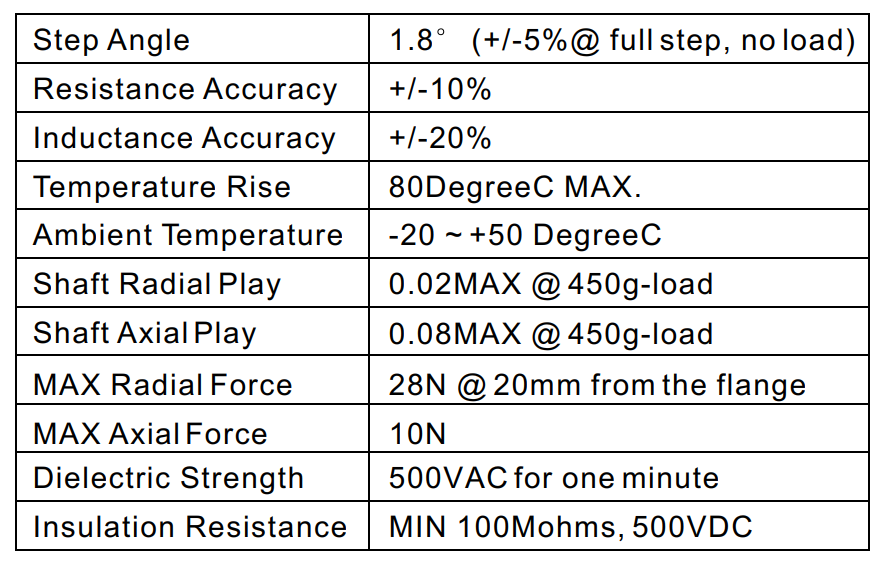

With a $\pm5\%$ (of a full step) of accuracy (this is a common number for normal steppers), the maximum possible deviation is:
$$1.8\degree \cdot \pm0.05 = \pm0.09\degree$$

This means that we can have,
$$\frac{\pm0.09\degree}{0.1125\degree} = \pm80\%$$

of error in a given microstep due to the step accuracy of the motor!

In, fact our total step error is:
$$\pm0.09\degree \rightarrow 0.18\degree$$

which is greater than the microstepping resolution!
$$0.18\degree \gt 0.1125\degree$$

Thus, our actual positional accuracy is limited to:
$$\frac{360\degree}{0.18\degree} = 2000\frac{steps}{rot}$$

And we can theoretically only benefit from:
$$\frac{1.8\degree}{0.18\degree} = 10\text{x microstepping}$$

Most drivers only support 8x or 16x step accuracy so we choose 16x because it is the smallest value that gets us the max resolution out of the steppers (now you see where the number comes from :D).

#### Resources
Here are some good resources on this if you want to learn more:
[http://users.ece.utexas.edu/~valvano/Datasheets/StepperMicrostep.pdf](http://users.ece.utexas.edu/~valvano/Datasheets/StepperMicrostep.pdf)
[https://e2e.ti.com/blogs_/b/industrial_strength/posts/microstepping-resolution-vs-microstepping-accuracy-clearing-up-the-confusion](https://e2e.ti.com/blogs_/b/industrial_strength/posts/microstepping-resolution-vs-microstepping-accuracy-clearing-up-the-confusion)
[https://www.geckodrive.com/support/accuracy-and-resolution](https://www.geckodrive.com/support/accuracy-and-resolution)


### Encoder Resolution
So now that we have our target of $2000\frac{steps}{rot}$ we can determine if our encoder is good enough.

The datasheet specs a maximum resolution of $2048\frac{counts}{rot}$ or $\log_2{2048} = 11\text{-bit}$ in the ABI (quadrature) interface so we should be able to meet the resolution target we need in terms of positioning accuracy.
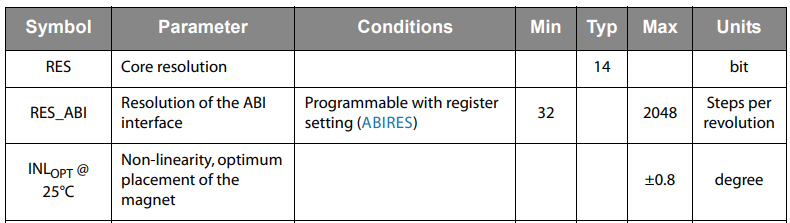

NOTE: I may want to find an encoder that can do higher resolution to improve control, this is kinda cutting it close...

The microcontroller on the STSPIN (the [STM32F031C6](https://www.st.com/en/microcontrollers-microprocessors/stm32f031c6.html)) also has two 16-bit timers we can use in encoder mode to read the quadrature encoder input.

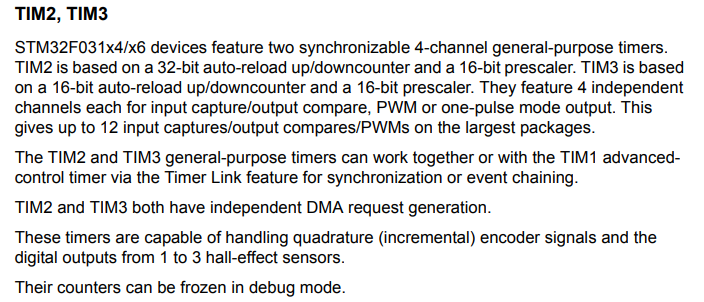